In [196]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from seaborn import kdeplot
import numpy as np
sns.set_theme(color_codes=True)



from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

import warnings
warnings.filterwarnings('ignore')

In [197]:
df = pd.read_csv('C:/Users/User/Desktop/ML/data.csv')
df.head()

,id,author,geometry,pressure [MPa],mass_flux [kg/m2-s],x_e_out [-],D_e [mm],D_h [mm],length [mm],chf_exp [MW/m2]
0,0,Thompson,tube,7.00,3770.0,0.1754,NaN,10.8,432.0,3.6
1,1,Thompson,tube,NaN,6049.0,-0.0416,10.3,10.3,762.0,6.2
2,2,Thompson,NaN,13.79,2034.0,0.0335,7.7,7.7,457.0,2.5
3,3,Beus,annulus,13.79,3679.0,-0.0279,5.6,15.2,2134.0,3.0
4,4,NaN,tube,13.79,686.0,NaN,11.1,11.1,457.0,2.8


In [198]:
df.isnull().mean()

id                     0.000000
author                 0.158766
geometry               0.173809
pressure [MPa]         0.140690
mass_flux [kg/m2-s]    0.151403
x_e_out [-]            0.329130
D_e [mm]               0.173429
D_h [mm]               0.145020
length [mm]            0.150392
chf_exp [MW/m2]        0.000000
dtype: float64

In [199]:
df = df.dropna()
df.isnull().sum()

id                     0
author                 0
geometry               0
pressure [MPa]         0
mass_flux [kg/m2-s]    0
x_e_out [-]            0
D_e [mm]               0
D_h [mm]               0
length [mm]            0
chf_exp [MW/m2]        0
dtype: int64

In [200]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6538 entries, 3 to 31635
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   6538 non-null   int64  
 1   author               6538 non-null   object 
 2   geometry             6538 non-null   object 
 3   pressure [MPa]       6538 non-null   float64
 4   mass_flux [kg/m2-s]  6538 non-null   float64
 5   x_e_out [-]          6538 non-null   float64
 6   D_e [mm]             6538 non-null   float64
 7   D_h [mm]             6538 non-null   float64
 8   length [mm]          6538 non-null   float64
 9   chf_exp [MW/m2]      6538 non-null   float64
dtypes: float64(7), int64(1), object(2)
memory usage: 561.9+ KB


In [201]:
df.describe()

,id,pressure [MPa],mass_flux [kg/m2-s],x_e_out [-],D_e [mm],D_h [mm],length [mm],chf_exp [MW/m2]
count,6538.000000,6538.000000,6538.000000,6538.000000,6538.000000,6538.000000,6538.00000,6538.000000
mean,15798.290609,10.678071,3061.074641,-0.000897,8.616779,14.006256,838.18446,3.807250
std,9152.624514,4.259407,1770.709688,0.102557,5.170097,19.345388,671.75760,1.935137
min,3.000000,0.100000,0.000000,-0.866700,1.000000,1.000000,10.00000,0.800000
25%,7876.250000,6.890000,1505.000000,-0.047200,5.000000,5.600000,318.00000,2.400000
50%,15770.500000,11.070000,2730.000000,0.004300,7.800000,10.000000,610.00000,3.500000
75%,23757.250000,13.790000,4069.000000,0.066875,10.800000,11.500000,914.00000,4.700000
max,31635.000000,20.680000,7975.000000,0.220100,37.500000,120.000000,3048.00000,19.300000


In [202]:
df.nunique()

id                     6538
author                   10
geometry                  3
pressure [MPa]          110
mass_flux [kg/m2-s]     590
x_e_out [-]            1309
D_e [mm]                 38
D_h [mm]                 43
length [mm]              59
chf_exp [MW/m2]         109
dtype: int64

In [203]:
object_columns = df.select_dtypes(include=['object']).columns
print("Object type columns:")
print(object_columns)

Object type columns:
Index(['author', 'geometry'], dtype='object')


In [204]:
numerical_columns = df.select_dtypes(include=['int64',
'float64']).columns
print("\nNumerical type columns:")
print(numerical_columns)


Numerical type columns:
Index(['id', 'pressure [MPa]', 'mass_flux [kg/m2-s]', 'x_e_out [-]',
       'D_e [mm]', 'D_h [mm]', 'length [mm]', 'chf_exp [MW/m2]'],
      dtype='object')


In [205]:
numerical_data = df.drop(['author' , 'geometry'], axis=1)
numerical_data.head()

,id,pressure [MPa],mass_flux [kg/m2-s],x_e_out [-],D_e [mm],D_h [mm],length [mm],chf_exp [MW/m2]
3,3,13.79,3679.0,-0.0279,5.6,15.2,2134.0,3.0
9,9,12.00,1617.0,0.1228,10.0,10.0,520.0,2.2
15,15,12.07,3255.0,0.0406,1.9,1.9,152.0,2.9
17,17,10.41,2563.0,0.1092,4.6,4.6,229.0,6.8
30,30,9.68,5615.0,0.0196,12.7,38.1,914.0,2.9


In [206]:
categorical_data = df.filter(['author' , 'geometry'], axis=1)
categorical_data.head()

,author,geometry
3,Beus,annulus
9,Peskov,tube
15,Thompson,tube
17,Thompson,tube
30,Janssen,annulus


<Axes: xlabel='pressure [MPa]', ylabel='Density'>

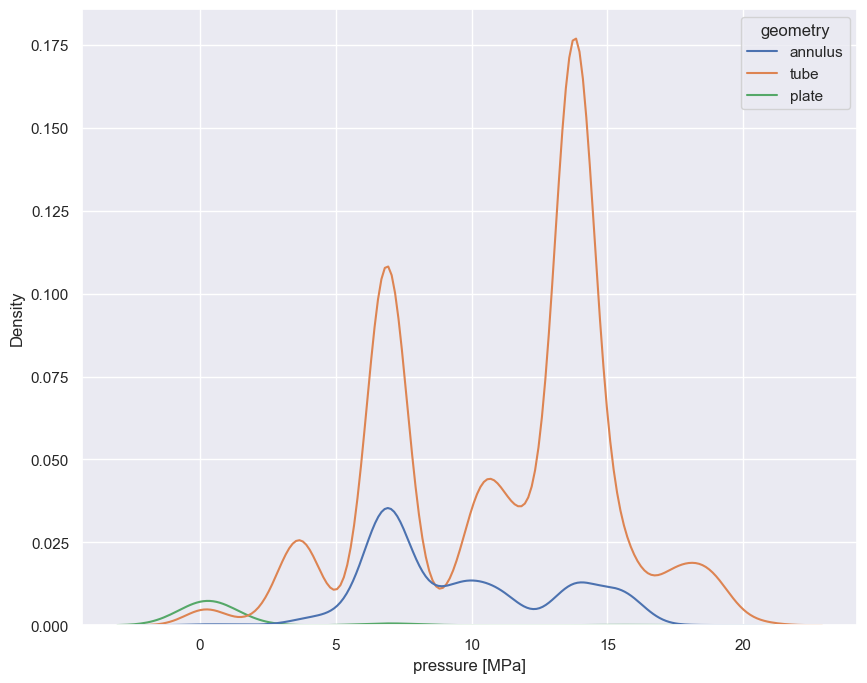

In [207]:
plt.figure(figsize=(10, 8))
kdeplot(data = df, x = 'pressure [MPa]', hue = 'geometry', color = 'blue')

<Axes: xlabel='mass_flux [kg/m2-s]', ylabel='Density'>

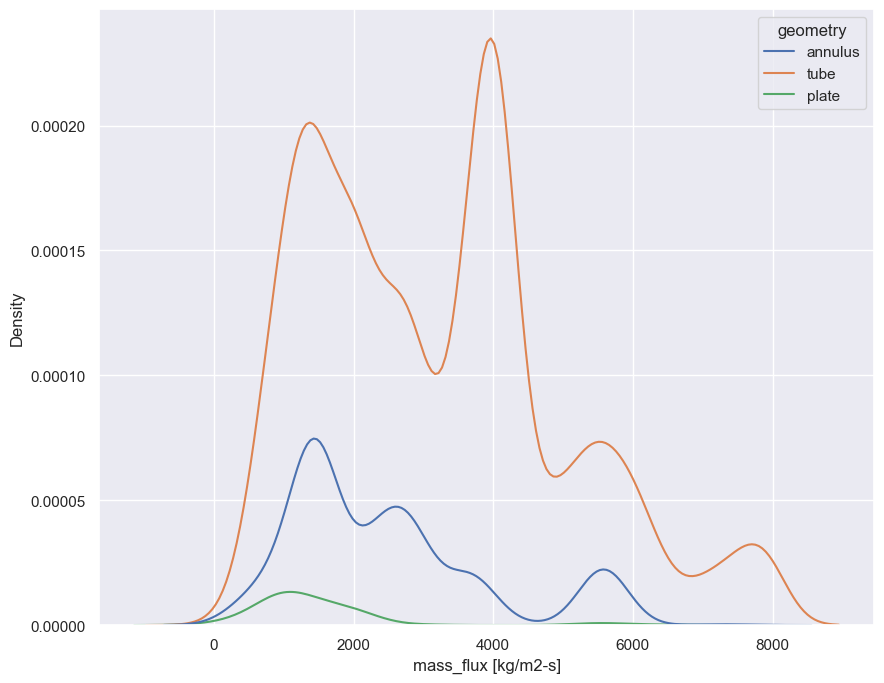

In [208]:
plt.figure(figsize=(10, 8))
kdeplot(data = df, x = 'mass_flux [kg/m2-s]', hue = 'geometry', color = 'blue')

<Axes: xlabel='x_e_out [-]', ylabel='Density'>

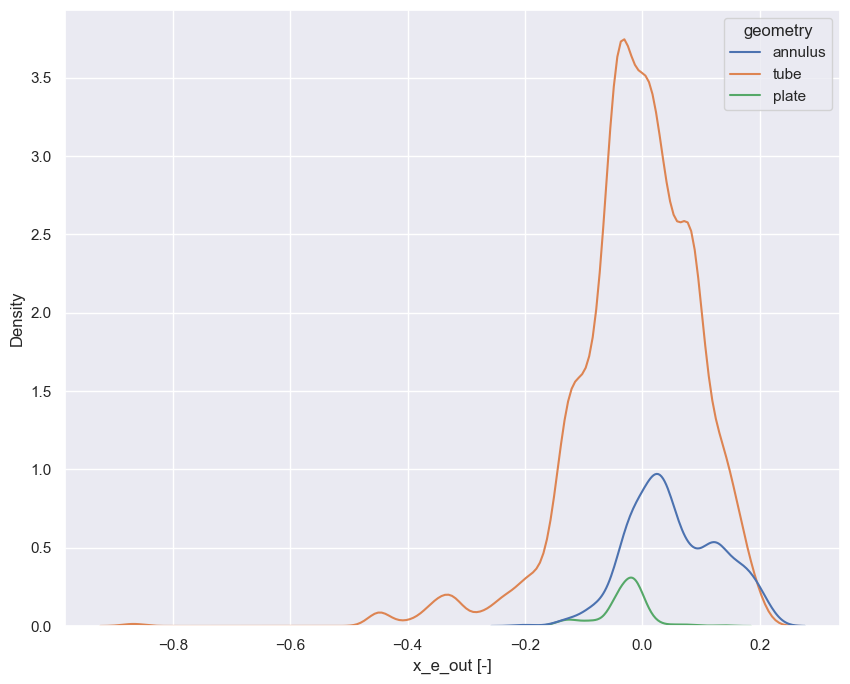

In [209]:
plt.figure(figsize=(10, 8))
kdeplot(data = df, x = 'x_e_out [-]', hue = 'geometry', color = 'blue')

<Axes: xlabel='D_e [mm]', ylabel='Density'>

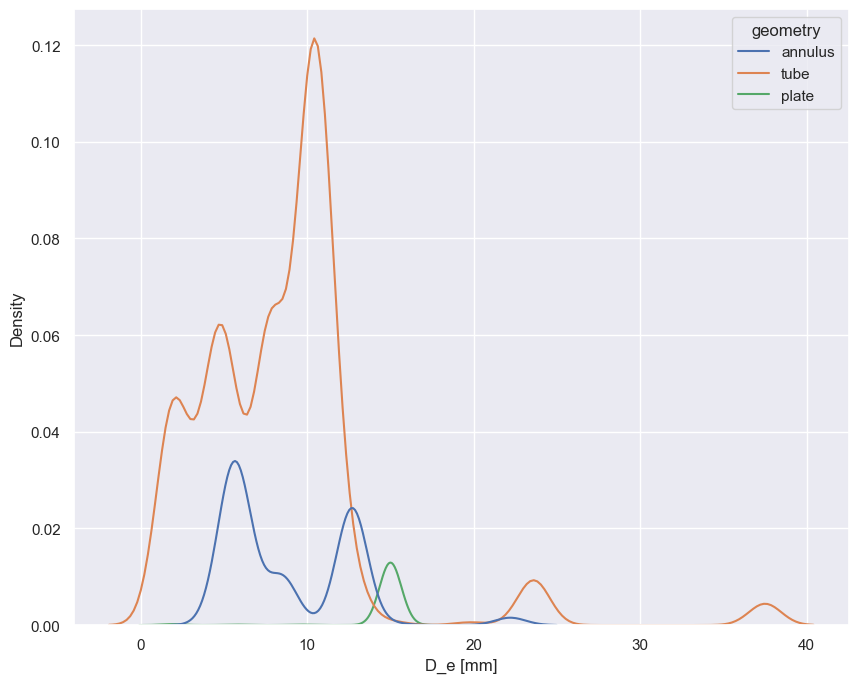

In [210]:
plt.figure(figsize=(10, 8))
kdeplot(data = df, x = 'D_e [mm]', hue = 'geometry', color = 'blue')

<Axes: xlabel='length [mm]', ylabel='Density'>

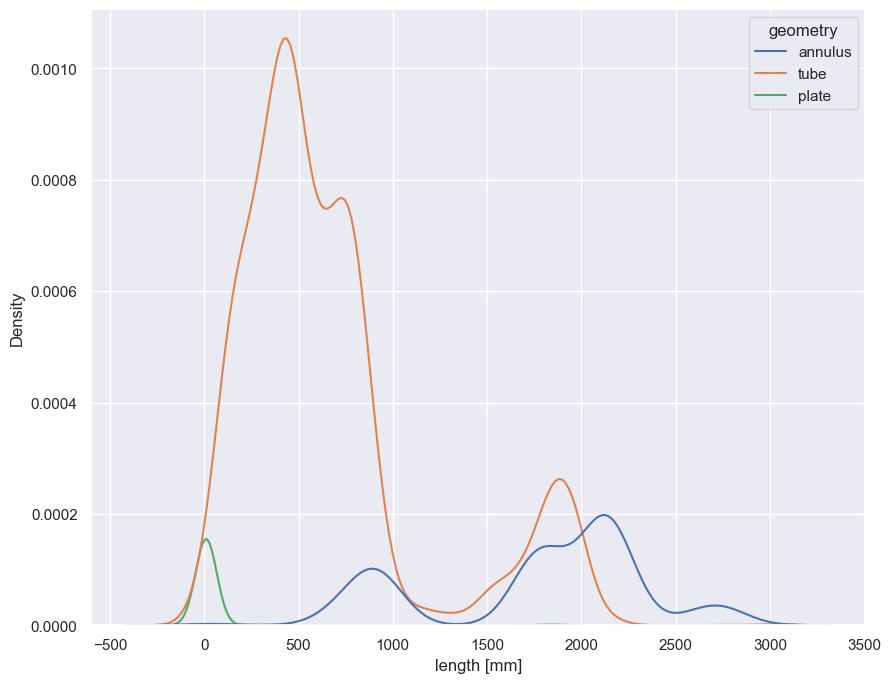

In [211]:
plt.figure(figsize=(10, 8))
kdeplot(data = df, x = 'length [mm]', hue = 'geometry', color = 'blue')

<Axes: xlabel='chf_exp [MW/m2]', ylabel='Density'>

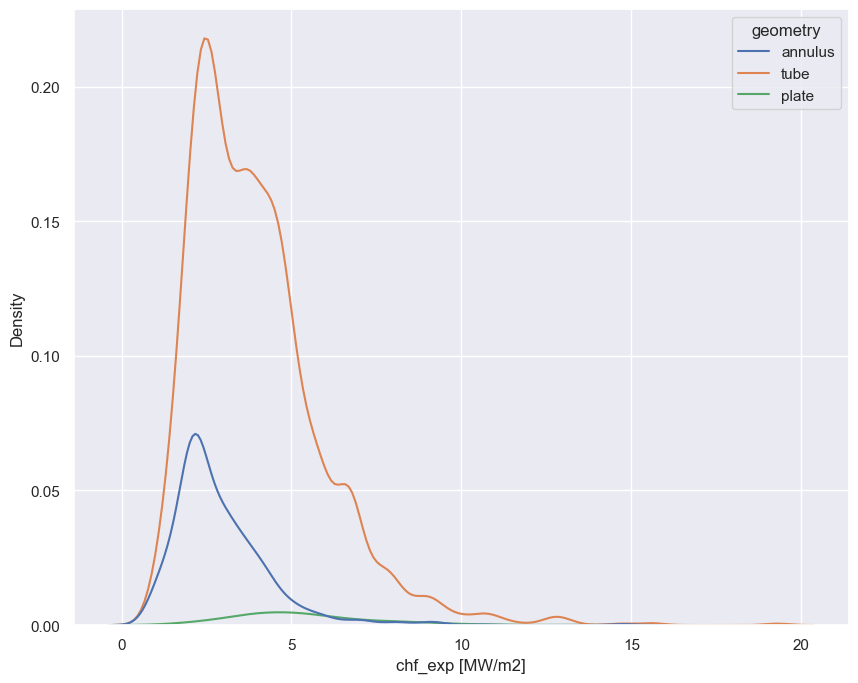

In [212]:
plt.figure(figsize=(10, 8))
kdeplot(data = df, x = 'chf_exp [MW/m2]', hue = 'geometry', color = 'blue')

<Axes: xlabel='pressure [MPa]', ylabel='Density'>

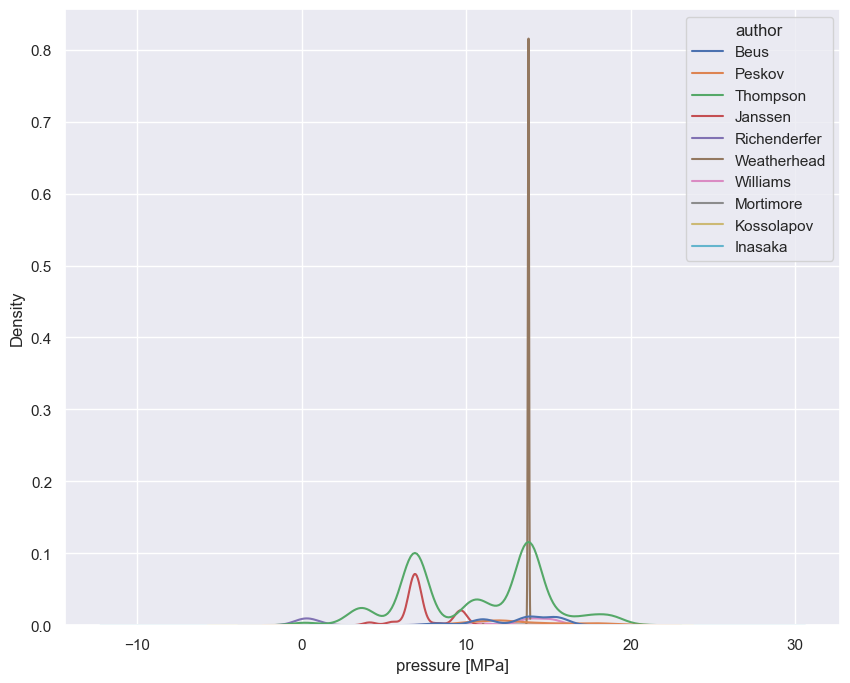

In [213]:
plt.figure(figsize=(10, 8))
kdeplot(data = df, x = 'pressure [MPa]', hue = 'author', color = 'blue')

<Axes: xlabel='mass_flux [kg/m2-s]', ylabel='Density'>

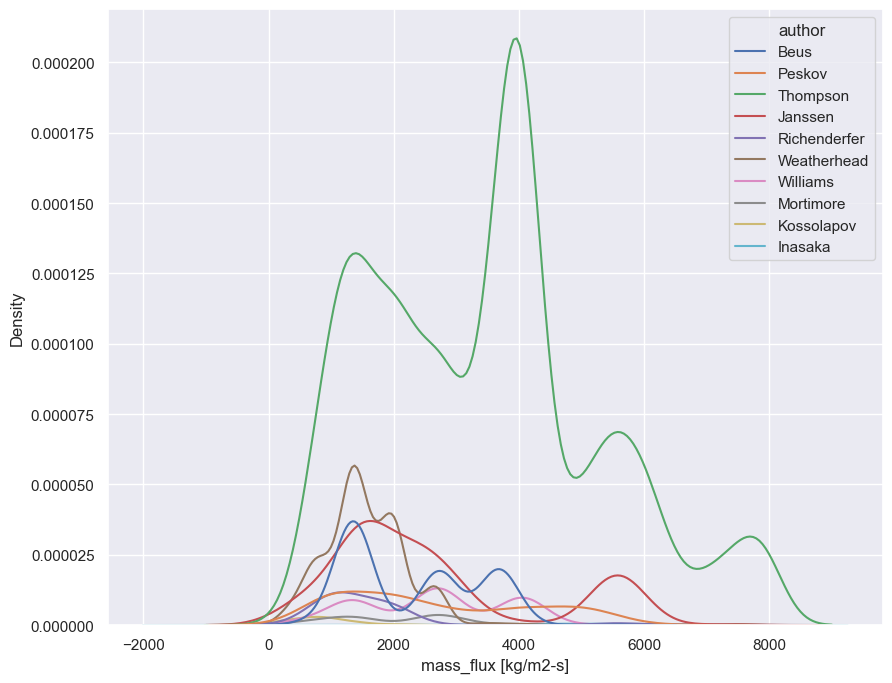

In [214]:
plt.figure(figsize=(10, 8))
kdeplot(data = df, x = 'mass_flux [kg/m2-s]', hue = 'author', color = 'blue')

<Axes: xlabel='x_e_out [-]', ylabel='Density'>

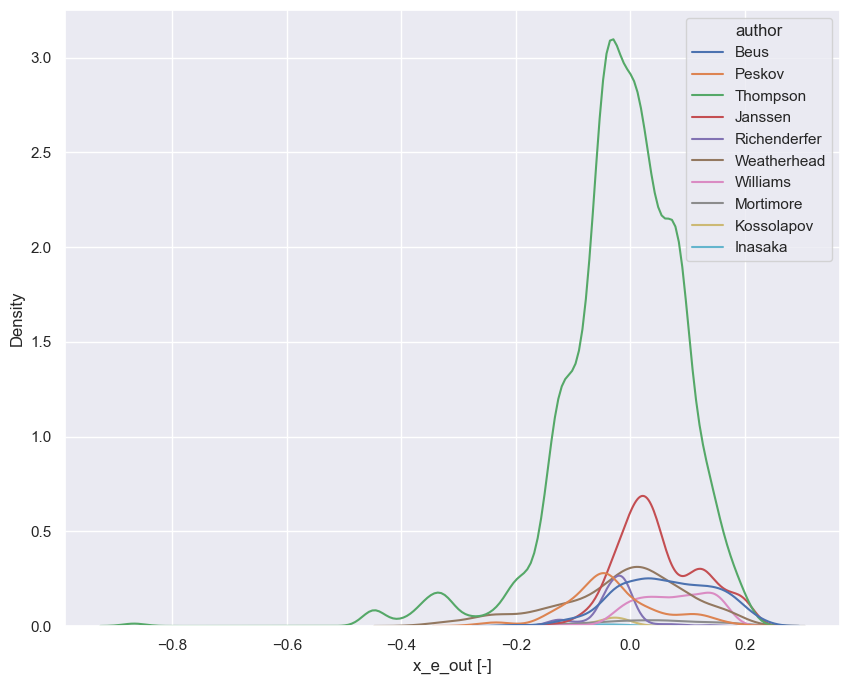

In [215]:
plt.figure(figsize=(10, 8))
kdeplot(data = df, x = 'x_e_out [-]', hue = 'author', color = 'blue')

<Axes: xlabel='D_e [mm]', ylabel='Density'>

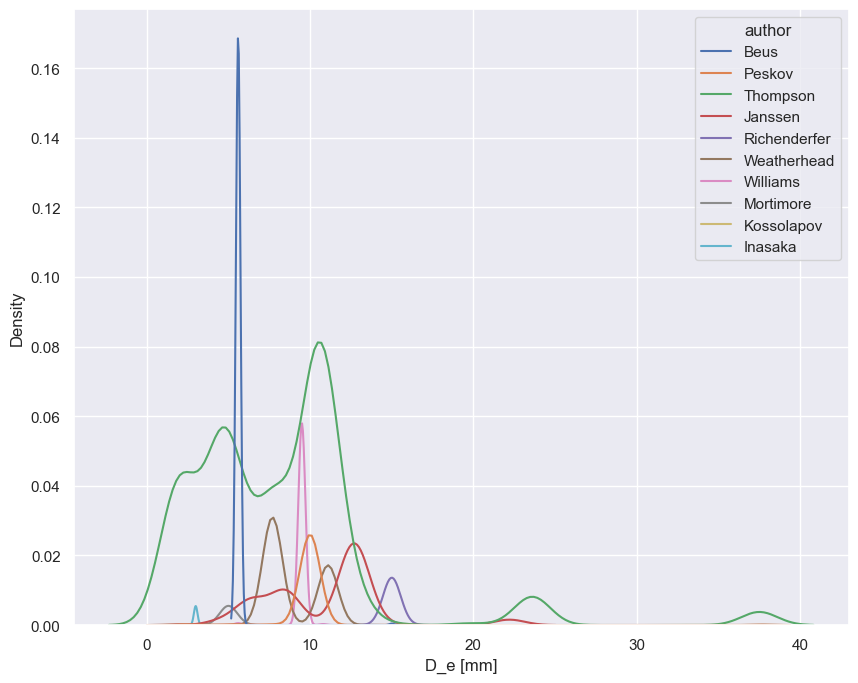

In [216]:
plt.figure(figsize=(10, 8))
kdeplot(data = df, x = 'D_e [mm]', hue = 'author', color = 'blue')

<Axes: xlabel='length [mm]', ylabel='Density'>

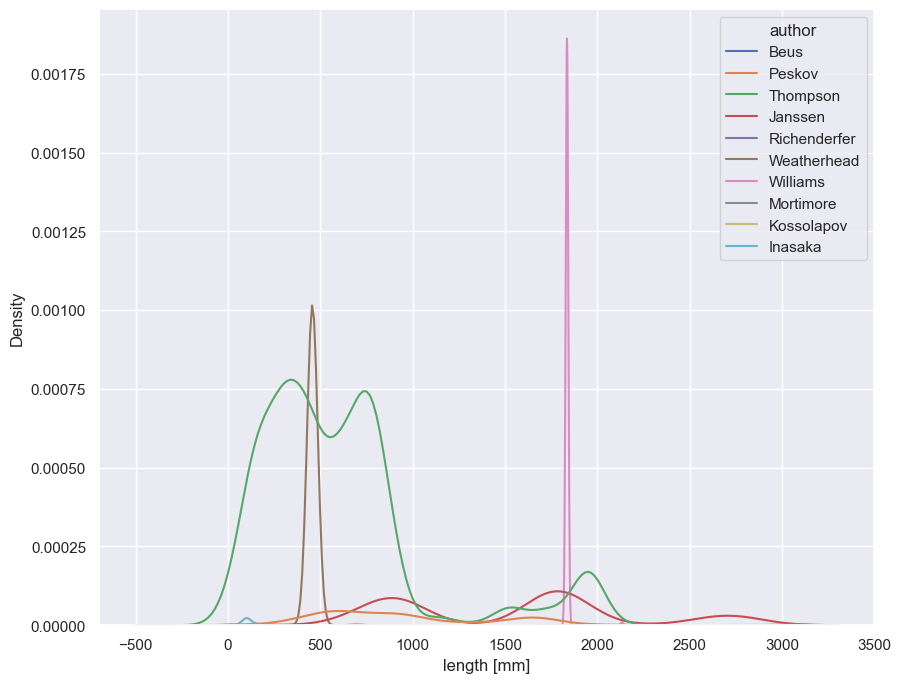

In [217]:
plt.figure(figsize=(10, 8))
kdeplot(data = df, x ='length [mm]', hue = 'author', color = 'blue')

<Axes: xlabel='chf_exp [MW/m2]', ylabel='Density'>

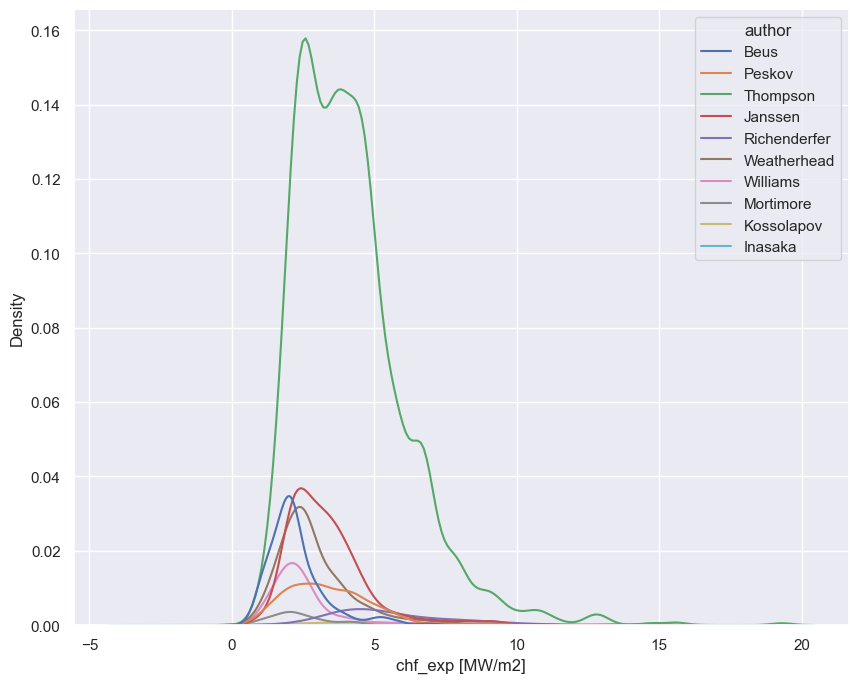

In [218]:
plt.figure(figsize=(10, 8))
kdeplot(data = df, x = 'chf_exp [MW/m2]', hue = 'author', color = 'blue')

<Axes: xlabel='mass_flux [kg/m2-s]', ylabel='Density'>

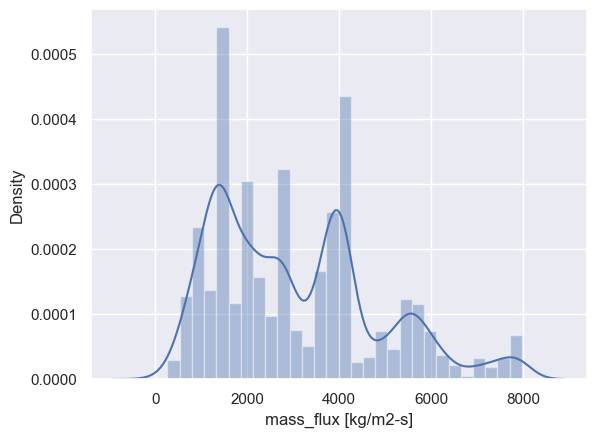

In [219]:
sns.distplot(df['mass_flux [kg/m2-s]'])

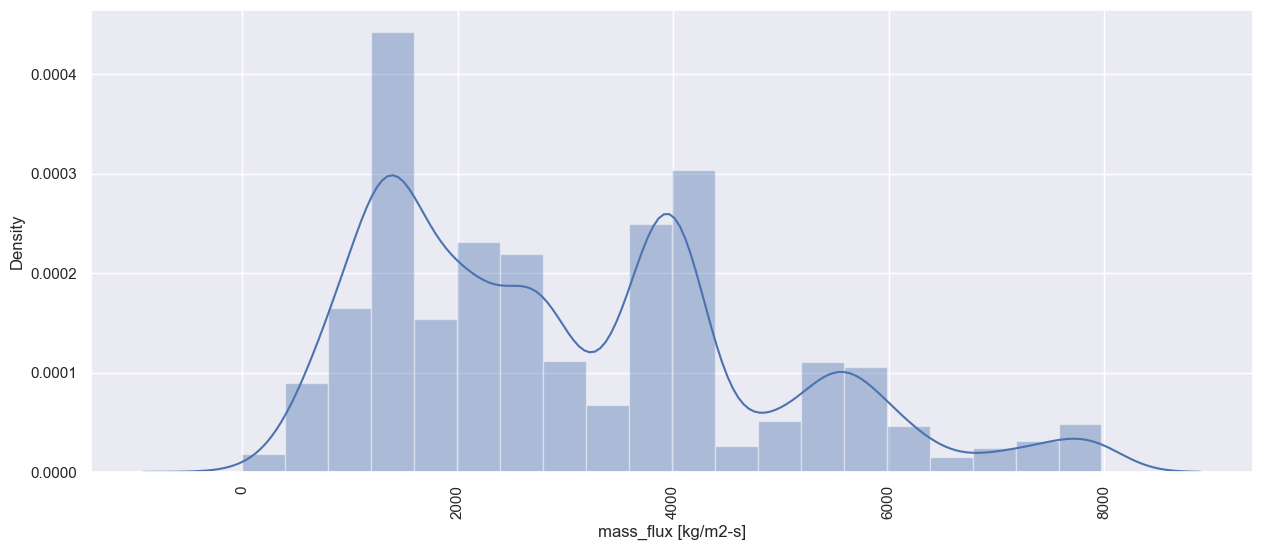

In [220]:
plt.figure(figsize=(15,6))
sns.distplot(df['mass_flux [kg/m2-s]'], bins = 20, kde = True)
plt.xticks(rotation = 90)
plt.show()

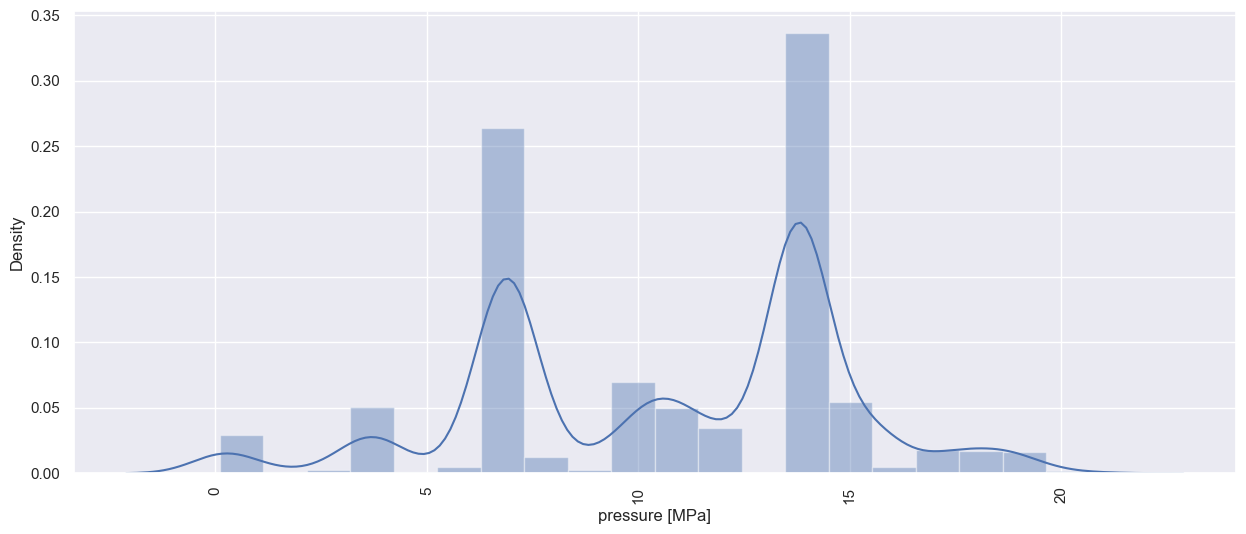

In [221]:
plt.figure(figsize=(15,6))
sns.distplot(df['pressure [MPa]'], bins = 20, kde = True)
plt.xticks(rotation = 90)
plt.show()

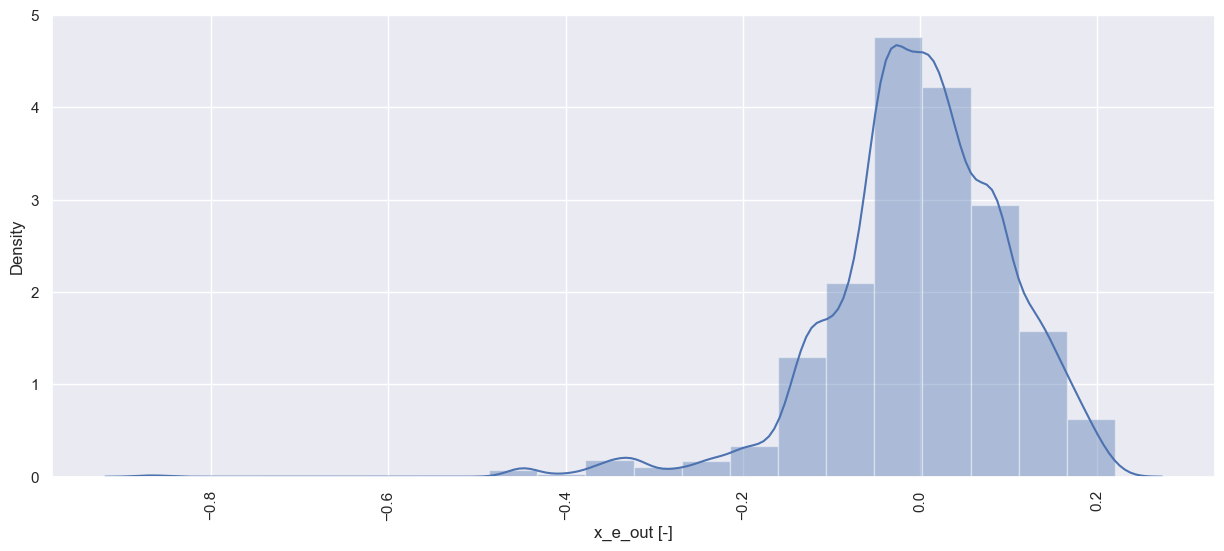

In [222]:
plt.figure(figsize=(15,6))
sns.distplot(df['x_e_out [-]'], bins = 20, kde = True)
plt.xticks(rotation = 90)
plt.show()

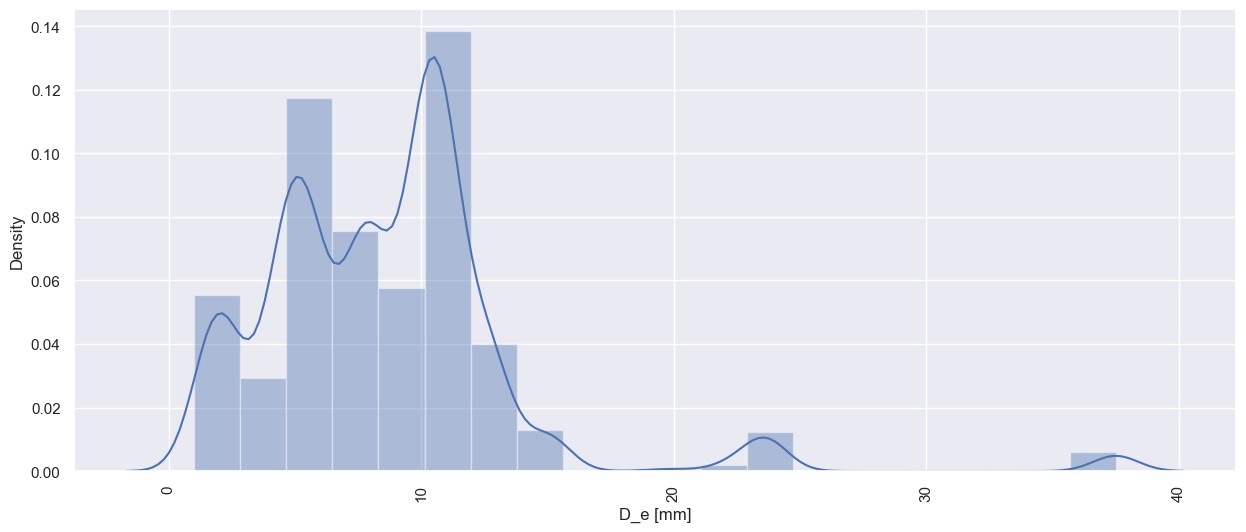

In [223]:
plt.figure(figsize=(15,6))
sns.distplot(df['D_e [mm]'], bins = 20, kde = True)
plt.xticks(rotation = 90)
plt.show()

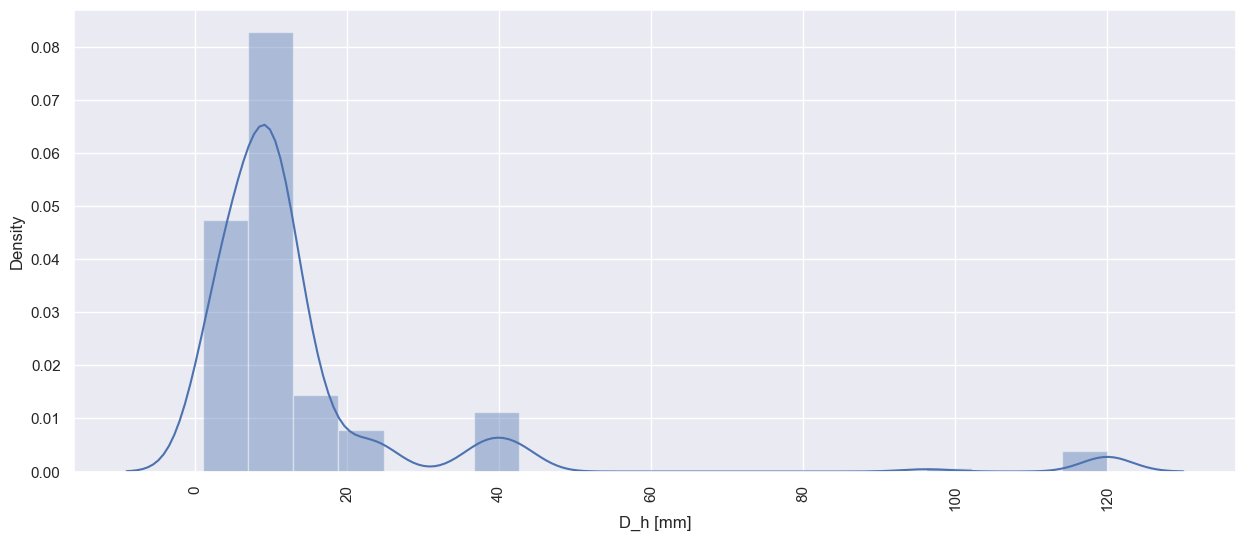

In [224]:
plt.figure(figsize=(15,6))
sns.distplot(df['D_h [mm]'], bins = 20, kde = True)
plt.xticks(rotation = 90)
plt.show()

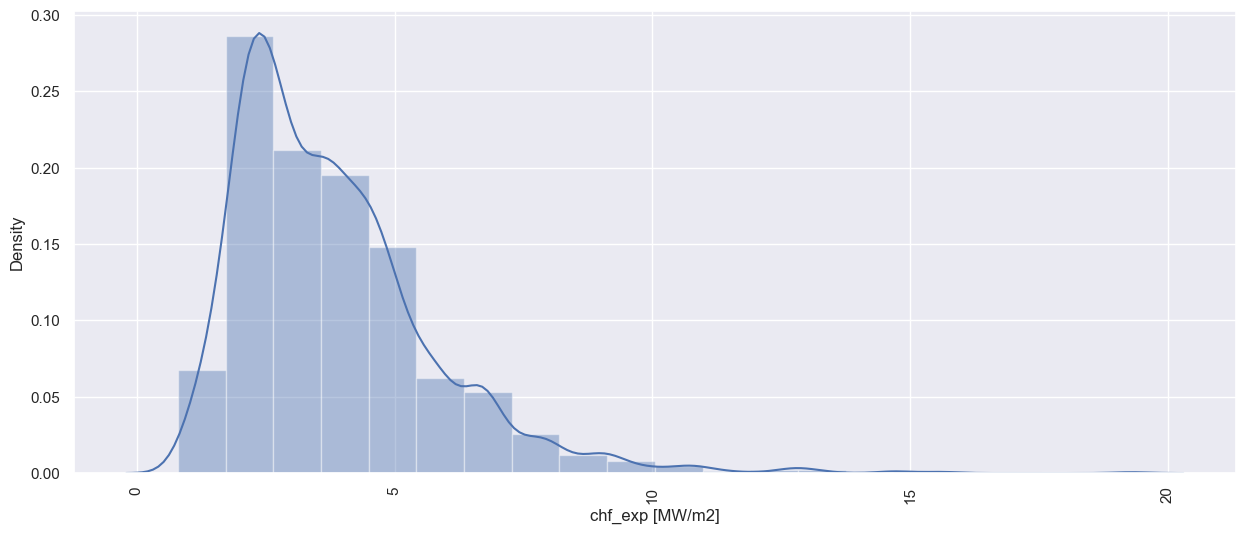

In [225]:
plt.figure(figsize=(15,6))
sns.distplot(df['chf_exp [MW/m2]'], bins = 20, kde = True)
plt.xticks(rotation = 90)
plt.show()

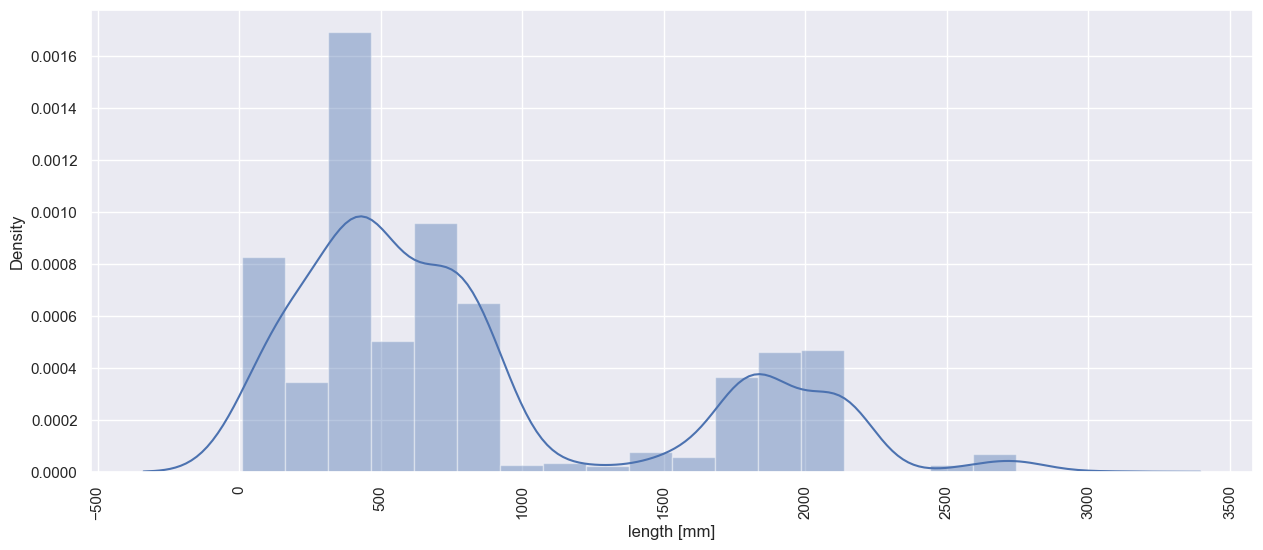

In [226]:
plt.figure(figsize=(15,6))
sns.distplot(df['length [mm]'], bins = 20, kde = True)
plt.xticks(rotation = 90)
plt.show()

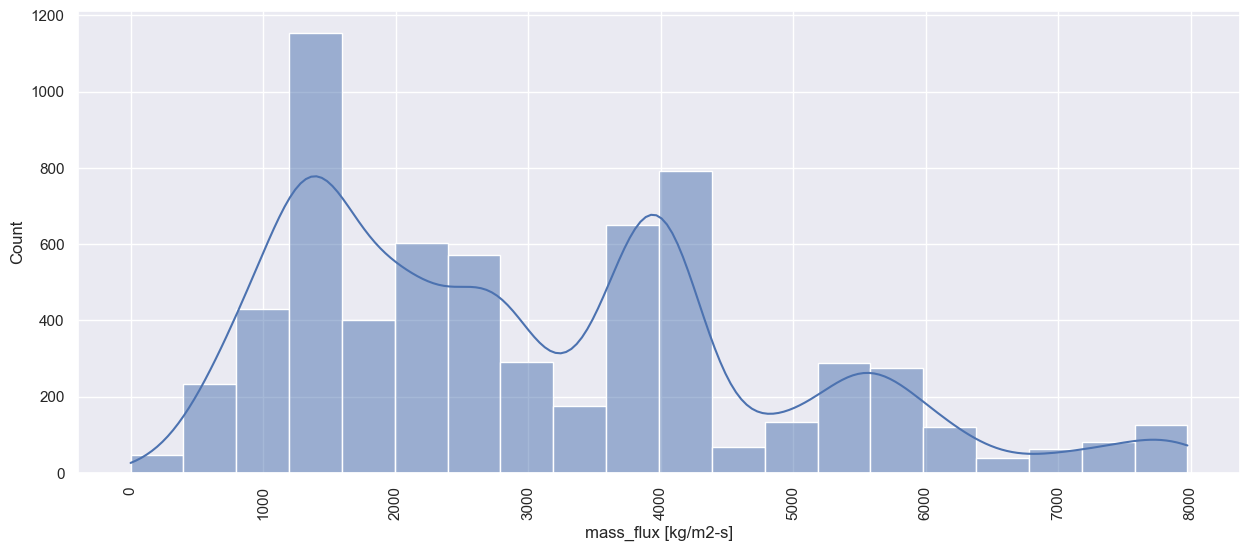

In [227]:
plt.figure(figsize=(15,6))
sns.histplot(df['mass_flux [kg/m2-s]'], bins = 20, kde = True, palette='hls')
plt.xticks(rotation = 90)
plt.show()

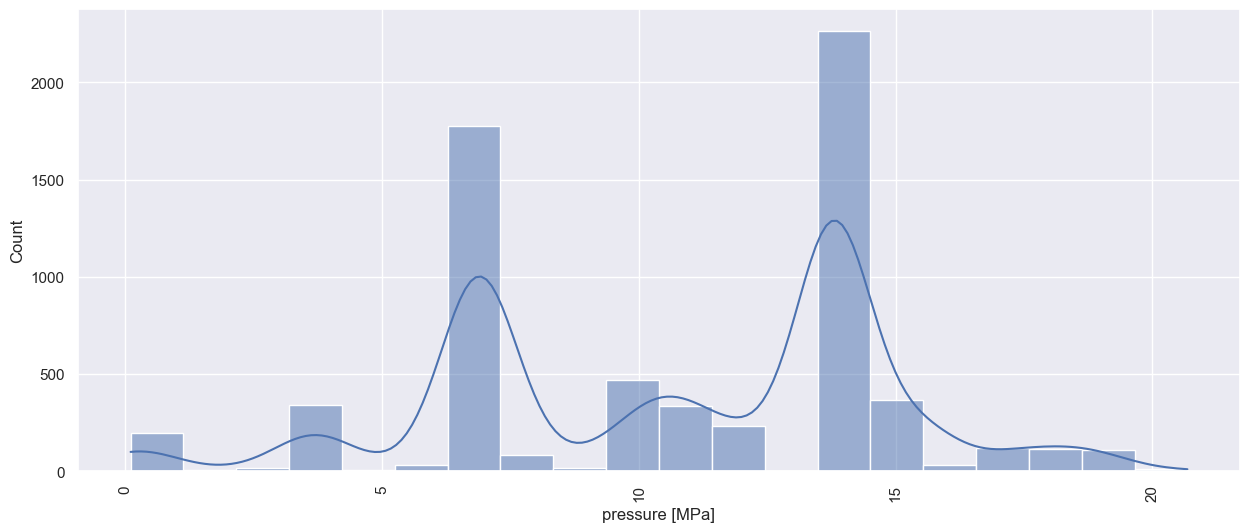

In [228]:
plt.figure(figsize=(15,6))
sns.histplot(df['pressure [MPa]'], bins = 20, kde = True, palette='hls')
plt.xticks(rotation = 90)
plt.show()

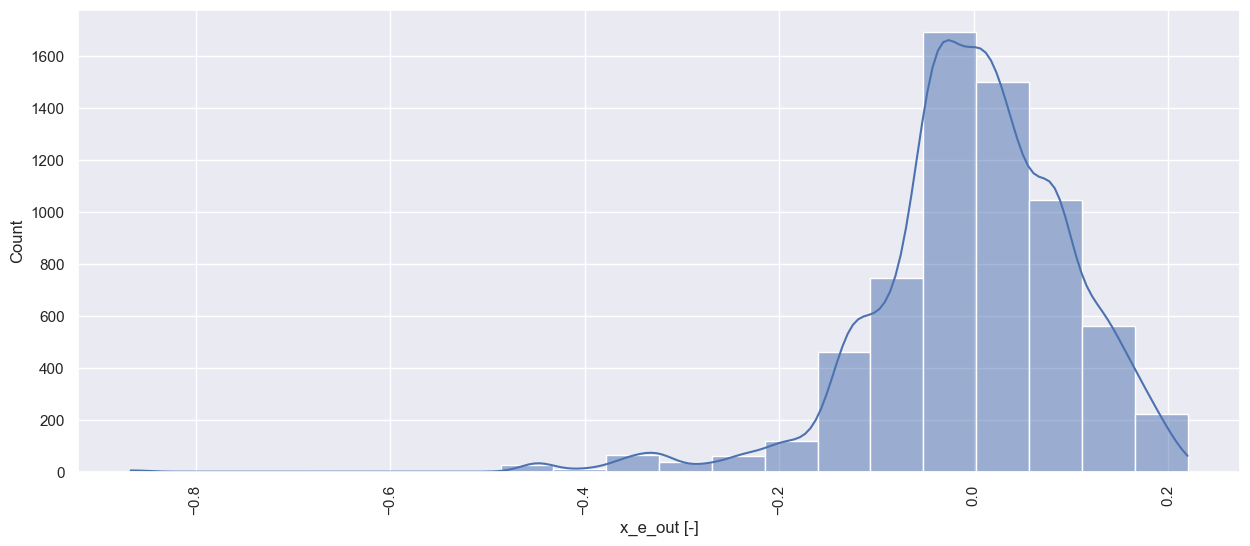

In [229]:
plt.figure(figsize=(15,6))
sns.histplot(df['x_e_out [-]'], bins = 20, kde = True, palette='hls')
plt.xticks(rotation = 90)
plt.show()

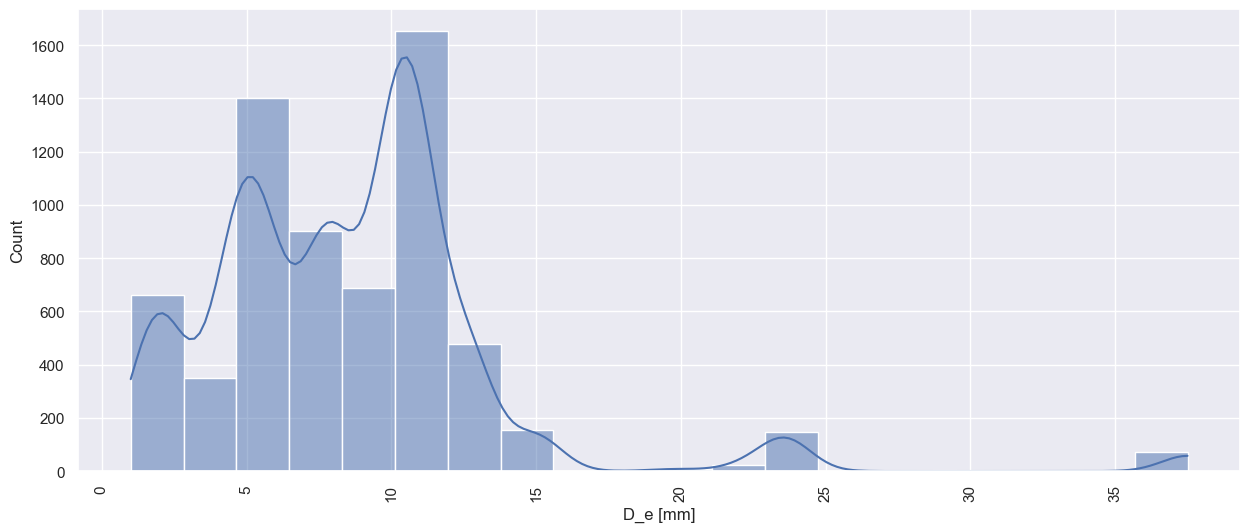

In [230]:
plt.figure(figsize=(15,6))
sns.histplot(df['D_e [mm]'], bins = 20, kde = True, palette='hls')
plt.xticks(rotation = 90)
plt.show()

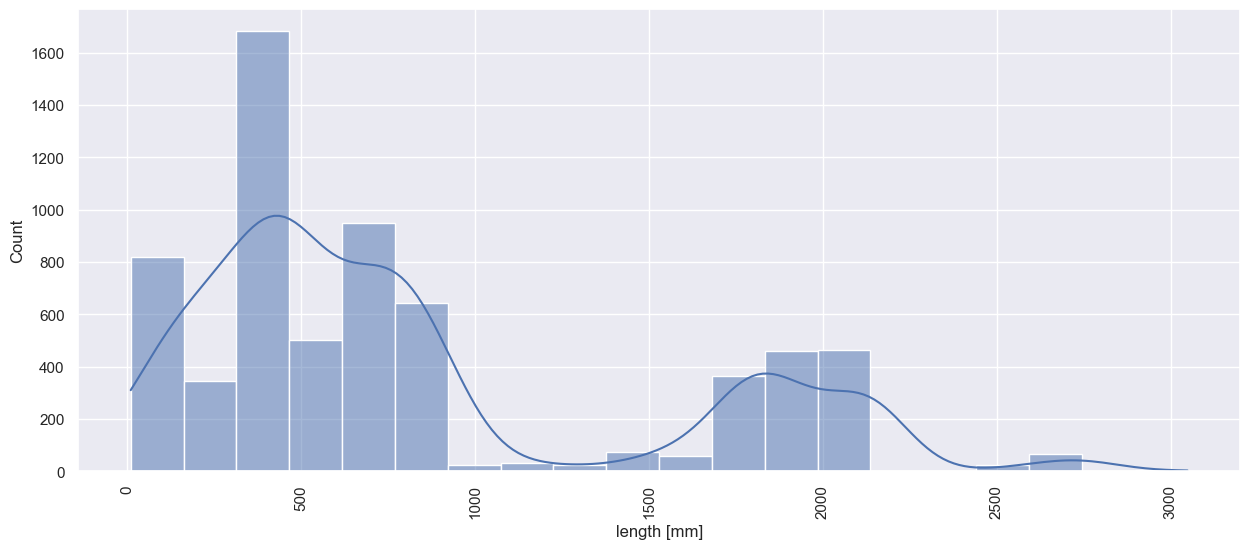

In [231]:
plt.figure(figsize=(15,6))
sns.histplot(df['length [mm]'], bins = 20, kde = True, palette='hls')
plt.xticks(rotation = 90)
plt.show()

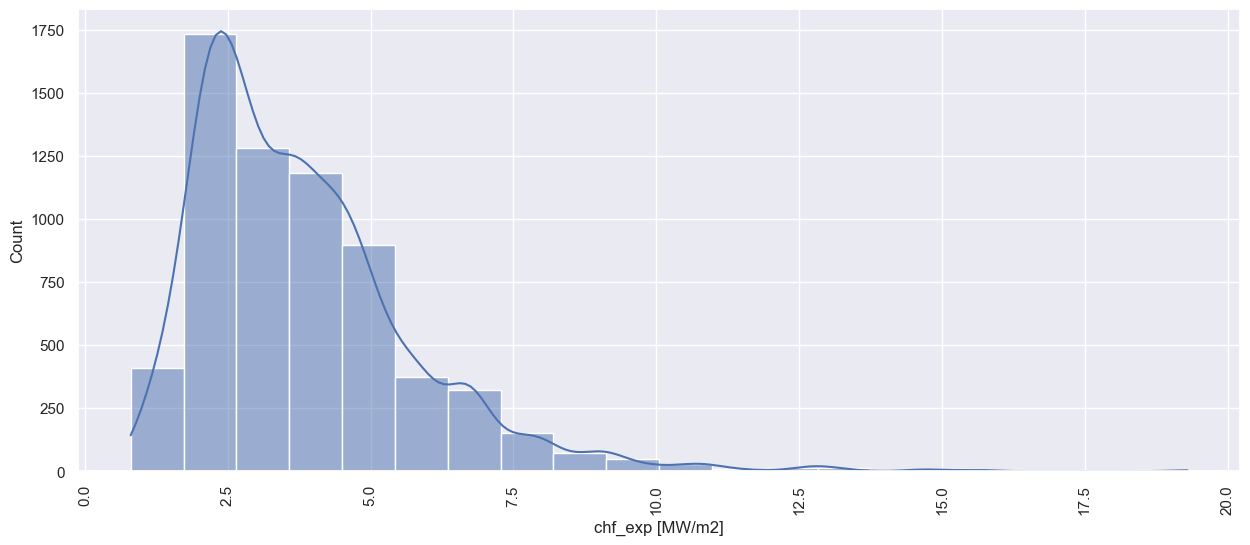

In [232]:
plt.figure(figsize=(15,6))
sns.histplot(df['chf_exp [MW/m2]'], bins = 20, kde = True, palette='hls')
plt.xticks(rotation = 90)
plt.show()

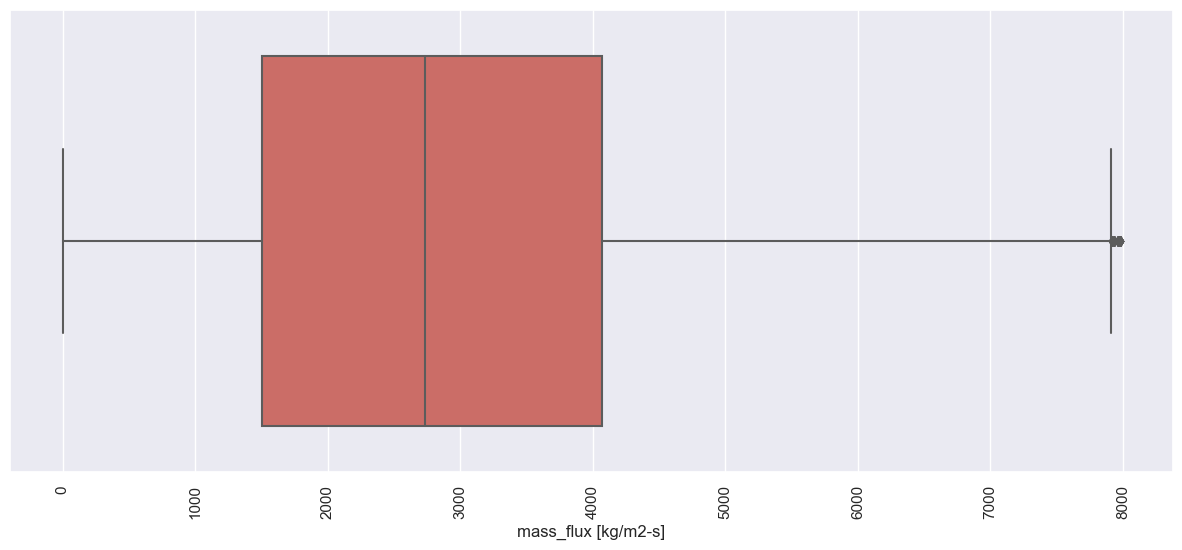

In [233]:
plt.figure(figsize=(15, 6))
sns.boxplot(x='mass_flux [kg/m2-s]', data=df, palette='hls')
plt.xticks(rotation=90)
plt.show()

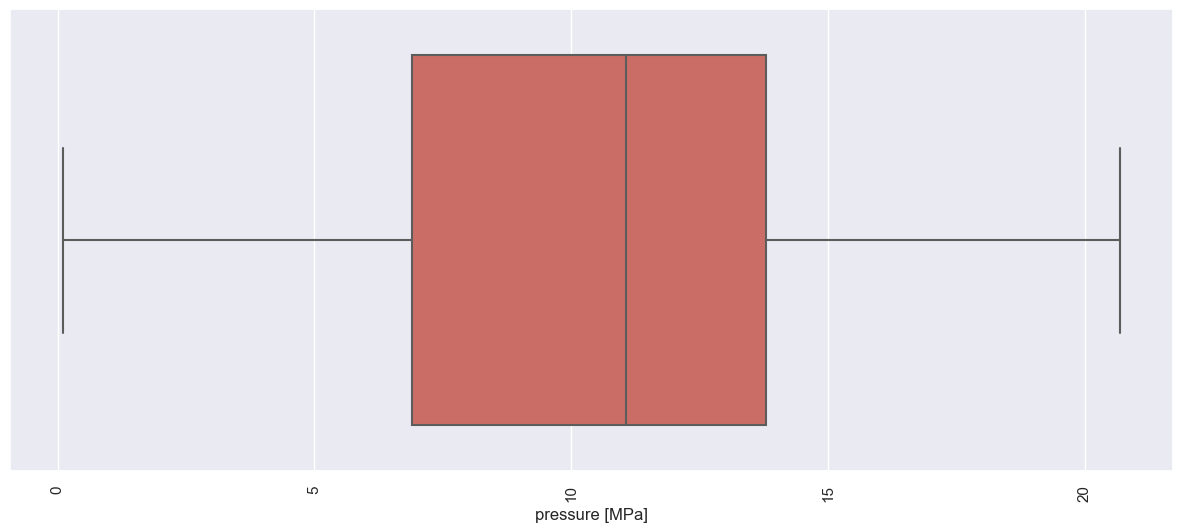

In [234]:
plt.figure(figsize=(15, 6))
sns.boxplot(x='pressure [MPa]', data=df, palette='hls')
plt.xticks(rotation=90)
plt.show()

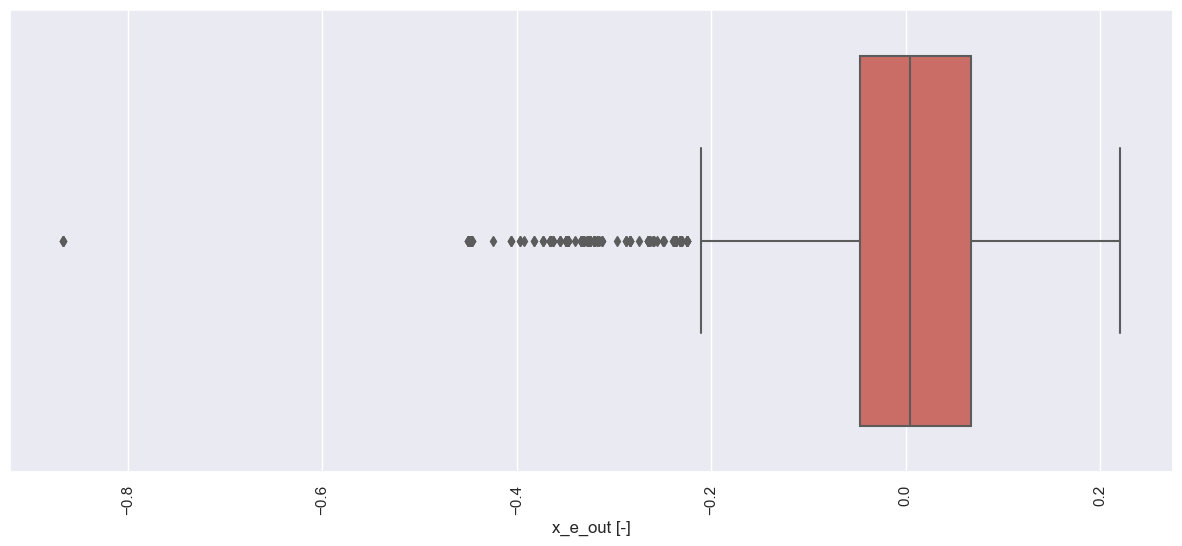

In [235]:
plt.figure(figsize=(15, 6))
sns.boxplot(x='x_e_out [-]', data=df, palette='hls')
plt.xticks(rotation=90)
plt.show()

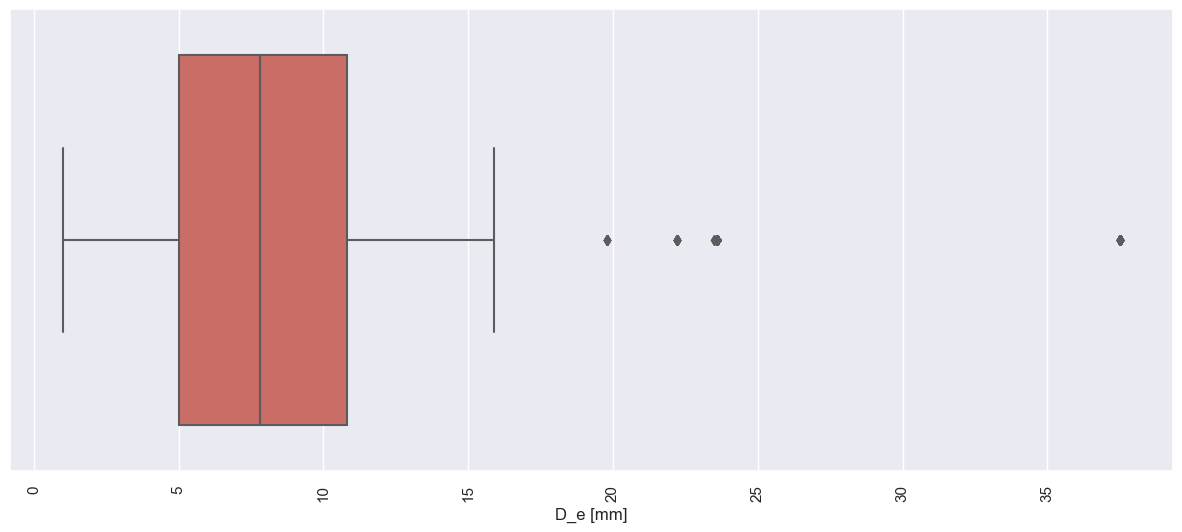

In [236]:
plt.figure(figsize=(15, 6))
sns.boxplot(x='D_e [mm]', data=df, palette='hls')
plt.xticks(rotation=90)
plt.show()

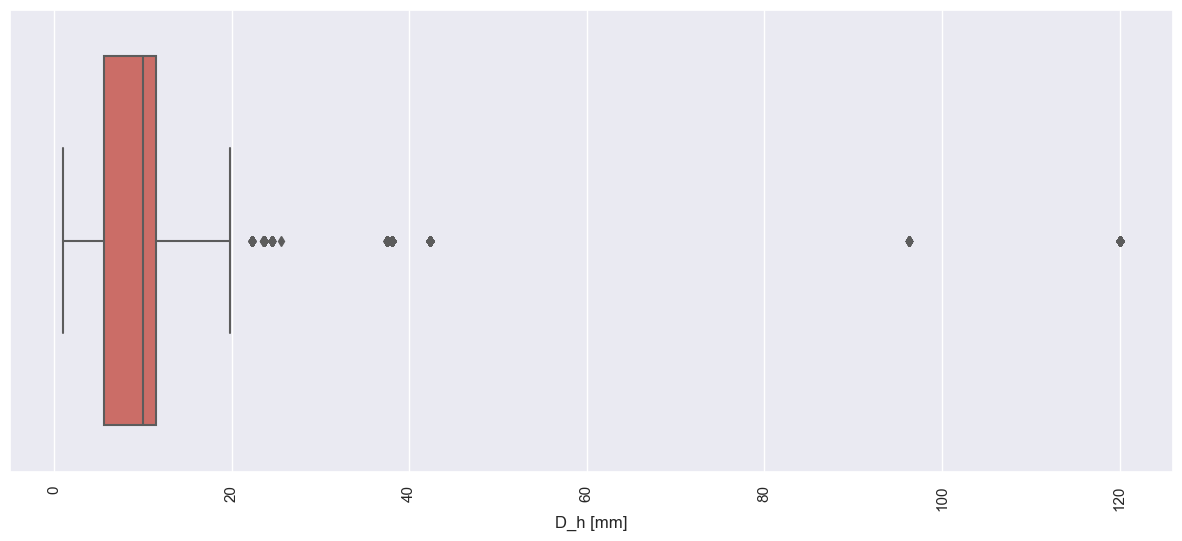

In [237]:
plt.figure(figsize=(15, 6))
sns.boxplot(x='D_h [mm]', data=df, palette='hls')
plt.xticks(rotation=90)
plt.show()

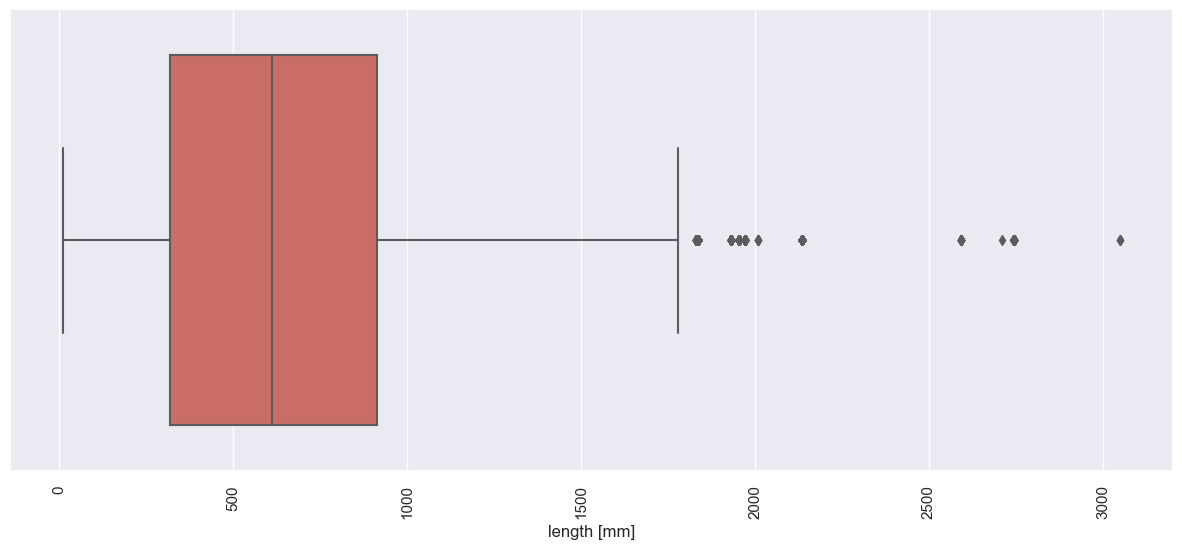

In [238]:
plt.figure(figsize=(15, 6))
sns.boxplot(x='length [mm]', data=df, palette='hls')
plt.xticks(rotation=90)
plt.show()

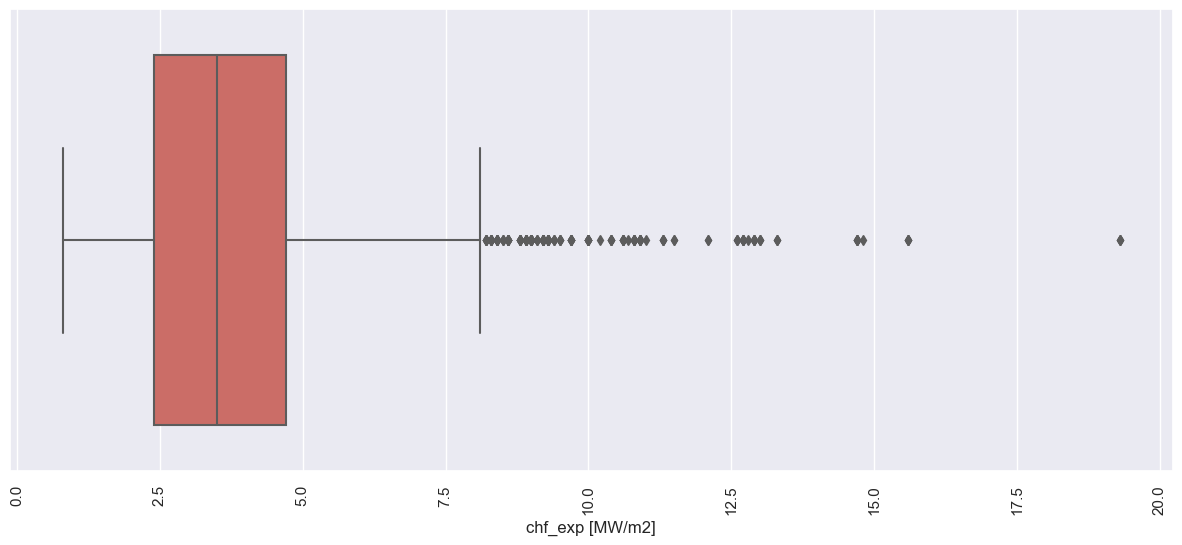

In [239]:
plt.figure(figsize=(15, 6))
sns.boxplot(x='chf_exp [MW/m2]', data=df, palette='hls')
plt.xticks(rotation=90)
plt.show()

In [240]:
df.isnull().mean()

id                     0.0
author                 0.0
geometry               0.0
pressure [MPa]         0.0
mass_flux [kg/m2-s]    0.0
x_e_out [-]            0.0
D_e [mm]               0.0
D_h [mm]               0.0
length [mm]            0.0
chf_exp [MW/m2]        0.0
dtype: float64

In [241]:
# Loop over each column in the DataFrame where dtype is 'object'
for col in df.select_dtypes(include=['object']).columns:
    
    # Print the column name and the unique values
    print(f"{col}: {df[col].unique()}")

author: ['Beus' 'Peskov' 'Thompson' 'Janssen' 'Richenderfer' 'Weatherhead'
 'Williams' 'Mortimore' 'Kossolapov' 'Inasaka']
geometry: ['annulus' 'tube' 'plate']


In [242]:
from sklearn import preprocessing

# Loop over each column in the DataFrame where dtype is 'object'
for col in df.select_dtypes(include=['object']).columns:
    
    # Initialize a LabelEncoder object
    label_encoder = preprocessing.LabelEncoder()
    
    # Fit the encoder to the unique values in the column
    label_encoder.fit(df[col].unique())
    
    # Transform the column using the encoder
    df[col] = label_encoder.transform(df[col])
    
    # Print the column name and the unique encoded values
    print(f"{col}: {df[col].unique()}")

author: [0 5 7 2 6 8 9 4 3 1]
geometry: [0 2 1]


<Axes: >

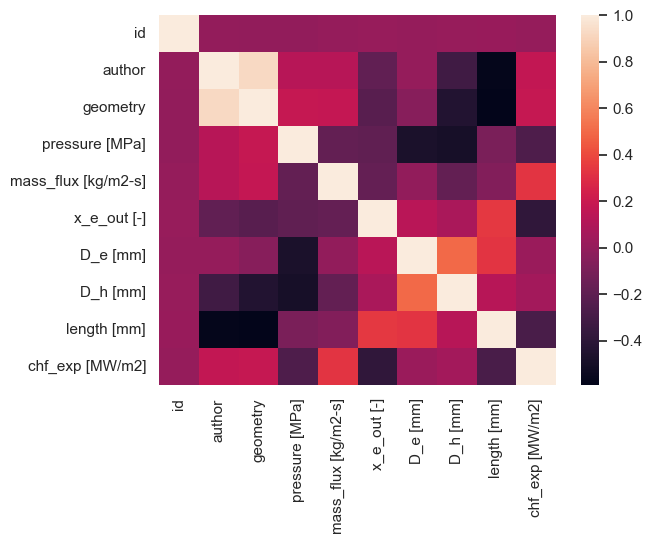

In [243]:
sns.heatmap(df.corr())

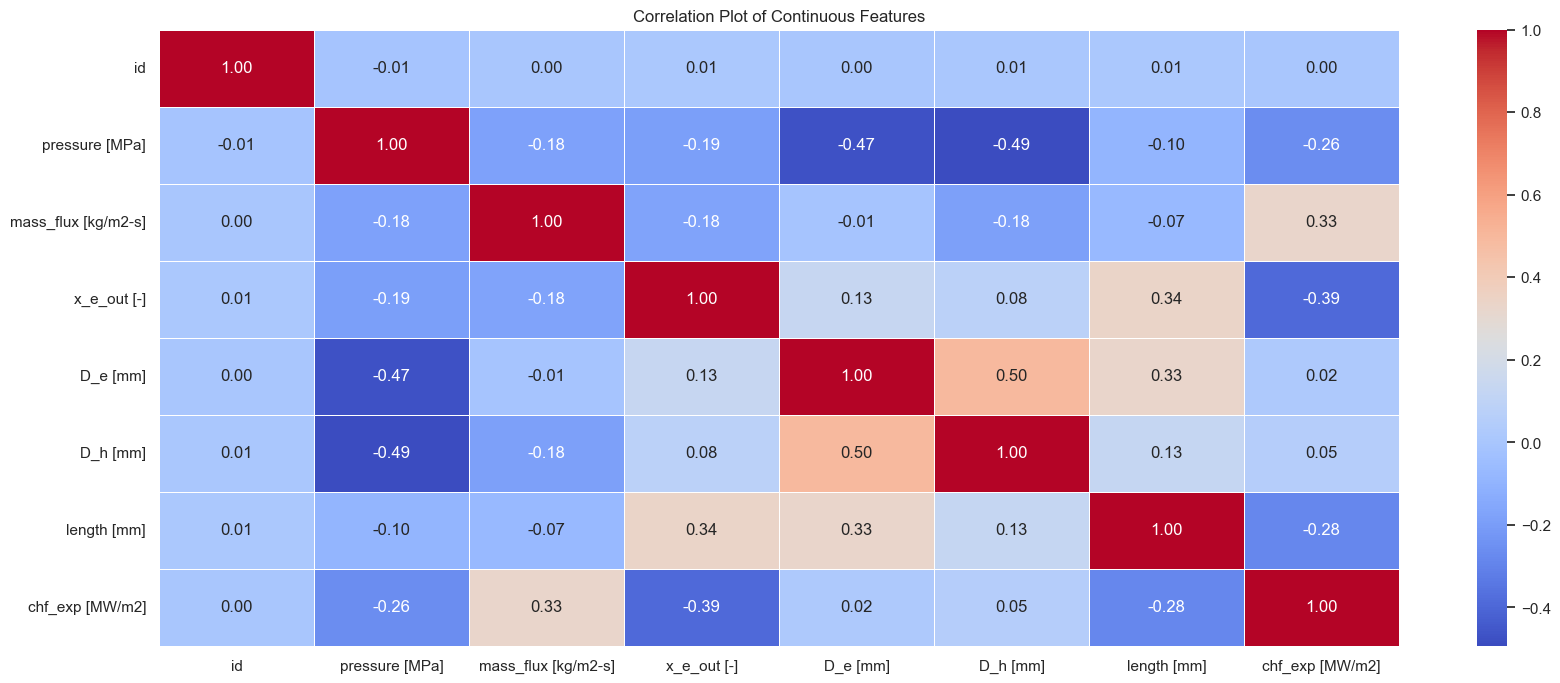

In [244]:
corr_matrix = df[numerical_columns].corr()
plt.figure(figsize=(20, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f",
linewidths=0.5)
plt.title('Correlation Plot of Continuous Features')
plt.show()

In [245]:
corr_matrix

,id,pressure [MPa],mass_flux [kg/m2-s],x_e_out [-],D_e [mm],D_h [mm],length [mm],chf_exp [MW/m2]
id,1.000000,-0.009771,0.002521,0.010951,0.001663,0.006543,0.012621,0.001554
pressure [MPa],-0.009771,1.000000,-0.181399,-0.192951,-0.473811,-0.492630,-0.095660,-0.262051
mass_flux [kg/m2-s],0.002521,-0.181399,1.000000,-0.176936,-0.009679,-0.184086,-0.068155,0.328890
x_e_out [-],0.010951,-0.192951,-0.176936,1.000000,0.132487,0.079711,0.339653,-0.388467
D_e [mm],0.001663,-0.473811,-0.009679,0.132487,1.000000,0.497224,0.325694,0.023505
D_h [mm],0.006543,-0.492630,-0.184086,0.079711,0.497224,1.000000,0.129533,0.050626
length [mm],0.012621,-0.095660,-0.068155,0.339653,0.325694,0.129533,1.000000,-0.283251
chf_exp [MW/m2],0.001554,-0.262051,0.328890,-0.388467,0.023505,0.050626,-0.283251,1.000000


In [246]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb


In [247]:


X = df.drop(columns=['mass_flux [kg/m2-s]'])
y = df['mass_flux [kg/m2-s]']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=42)
lr_regressor = LinearRegression()
lr_regressor.fit(X_train, y_train)
lr_score = lr_regressor.score(X_test, y_test)
print("Linear Regression Score:", lr_score)

Linear Regression Score: 0.2158981617255339


In [ ]:
X = df.drop(columns=['mass_flux [kg/m2-s]'])
y = df['mass_flux [kg/m2-s]'
x_train.columns[4]="mass_flux "       

In [187]:
svr_regressor = SVR()
svr_regressor.fit(X_train, y_train)
svr_score = svr_regressor.score(X_test, y_test)
print("SVR Regression Score:", svr_score)

SVR Regression Score: -0.03315125257717022


In [188]:
dt_regressor = DecisionTreeRegressor(random_state=42)
dt_regressor.fit(X_train, y_train)
dt_score = dt_regressor.score(X_test, y_test)
print("Decision Tree Regression Score:", dt_score)

Decision Tree Regression Score: -0.023553763405793404


In [189]:
rf_regressor = RandomForestRegressor(n_estimators=100,
random_state=42)
rf_regressor.fit(X_train, y_train)
rf_score = rf_regressor.score(X_test, y_test)
print("Random Forest Regression Score:", rf_score)

Random Forest Regression Score: 0.47282652977542783


In [57]:
print(y_train.value_counts(normalize=True))

mass_flux [kg/m2-s]
4069.0    0.035755
1519.0    0.023327
1356.0    0.021606
2034.0    0.019503
1000.0    0.018164
            ...   
3684.0    0.000191
3476.0    0.000191
1217.0    0.000191
4068.0    0.000191
3733.0    0.000191
Name: proportion, Length: 566, dtype: float64


In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=20)

In [60]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [61]:
from tensorflow.keras.layers import Input, Dense, Activation,Dropout
from tensorflow.keras.models import Model

In [62]:
input_layer = Input(shape=(X.shape[1],))
dense_layer0 = Dense(100, activation='relu' )(input_layer)
dense_layer1 = Dense(50, activation='relu' )(dense_layer0)
dense_layer2 = Dense(25, activation='relu' )(dense_layer1)
dense_layer3 = Dense(10, activation='relu' )(dense_layer2)
dense_layer4 = Dense(5, activation='relu' )(dense_layer3)
dense_layer5 = Dense(2, activation='relu' )(dense_layer4)
output = Dense(1)(dense_layer5)

In [63]:
model = Model(inputs = input_layer, outputs=output)
model.compile(loss="mean_absolute_error" , optimizer="adam" , metrics=["mean_absolute_error" ])

In [64]:
from keras.utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [65]:
history = model.fit(X_train, y_train, batch_size=5, epochs=5, verbose=1, validation_split=0.2)

Epoch 1/5
837/837 [==============================] - 9s 6ms/step - loss: 1604.7377 - mean_absolute_error: 1604.7377 - val_loss: 1248.1870 - val_mean_absolute_error: 1248.1870
Epoch 2/5
837/837 [==============================] - 3s 4ms/step - loss: 1209.5253 - mean_absolute_error: 1209.5253 - val_loss: 1216.3547 - val_mean_absolute_error: 1216.3547
Epoch 3/5
837/837 [==============================] - 3s 4ms/step - loss: 1185.9938 - mean_absolute_error: 1185.9938 - val_loss: 1188.7195 - val_mean_absolute_error: 1188.7195
Epoch 4/5
837/837 [==============================] - 3s 4ms/step - loss: 1171.2108 - mean_absolute_error: 1171.2107 - val_loss: 1180.2104 - val_mean_absolute_error: 1180.2104
Epoch 5/5
837/837 [==============================] - 4s 5ms/step - loss: 1162.6820 - mean_absolute_error: 1162.6820 - val_loss: 1175.8293 - val_mean_absolute_error: 1175.8293


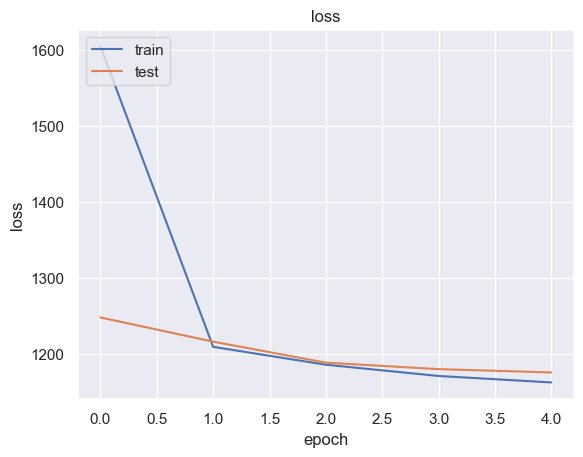

In [66]:
plt.plot(history.history['loss' ])
plt.plot(history.history['val_loss' ])
plt.title('loss' )
plt.ylabel('loss' )
plt.xlabel('epoch' )
plt.legend(['train' ,'test' ], loc='upper left' )
plt.show()

In [67]:
y_pred = model.predict(X_test)

41/41 [==============================] - 0s 3ms/step


In [68]:
from sklearn import metrics

print ('Mean Absolute Error:' , metrics.mean_absolute_error(y_test, y_pred))
print ('Mean Squared Error:' , metrics.mean_squared_error(y_test, y_pred))
print ('Root Mean Squared Error:' , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 1180.0935029662712
Mean Squared Error: 2494499.08976759
Root Mean Squared Error: 1579.3983315704718


In [69]:
df['mass_flux [kg/m2-s]'].mean()

3061.0746405628634

In [70]:
comparison_df = pd.DataFrame({'Actual' : y_test.values.tolist(), 'Predicted' : y_pred.tolist()})
comparison_df

,Actual,Predicted
0,3391.0,[2294.131103515625]
1,2699.0,[2479.27783203125]
2,1383.0,[1567.1533203125]
3,2034.0,[1640.791259765625]
4,1356.0,[1856.505859375]
...,...,...
1303,1000.0,[1299.2095947265625]
1304,3679.0,[2954.025390625]
1305,2034.0,[3416.301025390625]
1306,1354.0,[1681.99951171875]


In [71]:
X_test[1].shape

(9,)

In [72]:
single_point = X_test[1].reshape(1,-1)
single_point.shape

(1, 9)

In [73]:
model.predict(X_test[1].reshape(1,-1))

1/1 [==============================] - 0s 66ms/step


array([[2479.278]], dtype=float32)

In [74]:
y_test.values[1 ]

2699.0